In [ ]:
mkdir images

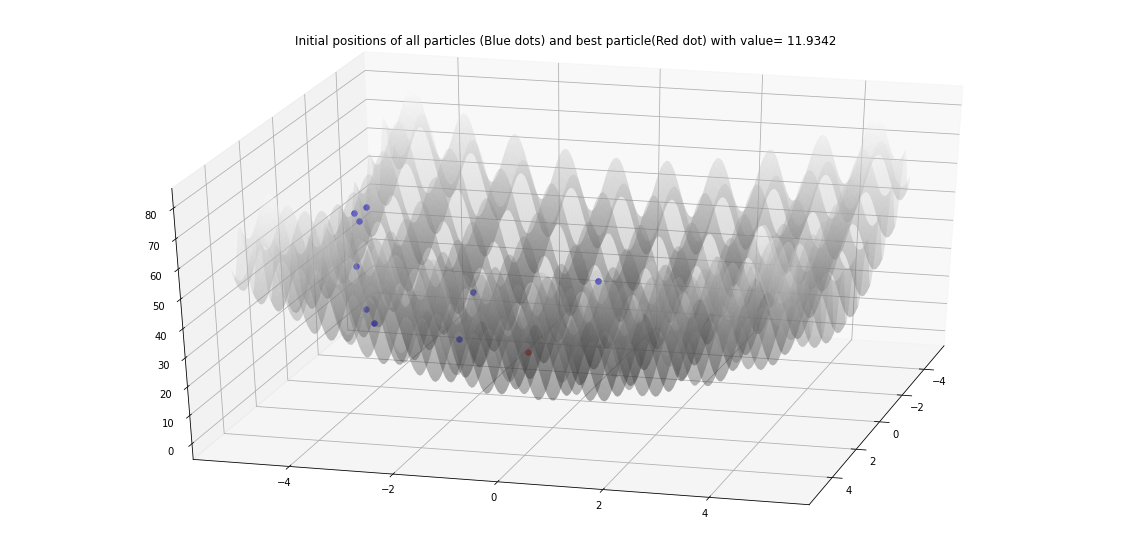

Iteration: 2 f([[-1.10978  0.07653]]) = 4.65774
Iteration: 4 f([[ 1.05488 -1.02613]]) = 2.88870
Iteration: 6 f([[ 1.05488 -0.01693]]) = 1.75815
Iteration: 8 f([[-0.01392 -0.96276]]) = 1.23790
Iteration: 18 f([[ 0.05339 -0.01693]]) = 0.61701
Iteration: 19 f([[-0.01525  0.01744]]) = 0.10639
Iteration: 27 f([[0.00158 0.01893]]) = 0.07149
Iteration: 28 f([[-0.00378 -0.00167]]) = 0.00339
Iteration: 33 f([[ 0.00028 -0.00057]]) = 0.00008
Iteration: 39 f([[-0.00036  0.0004 ]]) = 0.00006
Iteration: 40 f([[-0.0004  0.0003]]) = 0.00005
Iteration: 41 f([[ 7.0e-05 -4.2e-04]]) = 0.00004
Iteration: 42 f([[-0.00016  0.00015]]) = 0.00001
Iteration: 43 f([[ 0.00011 -0.00018]]) = 0.00001
Iteration: 44 f([[-0.00015  0.00011]]) = 0.00001
Iteration: 46 f([[ 6.e-05 -1.e-05]]) = 0.00000
Iteration: 47 f([[-1.e-05 -1.e-05]]) = 0.00000


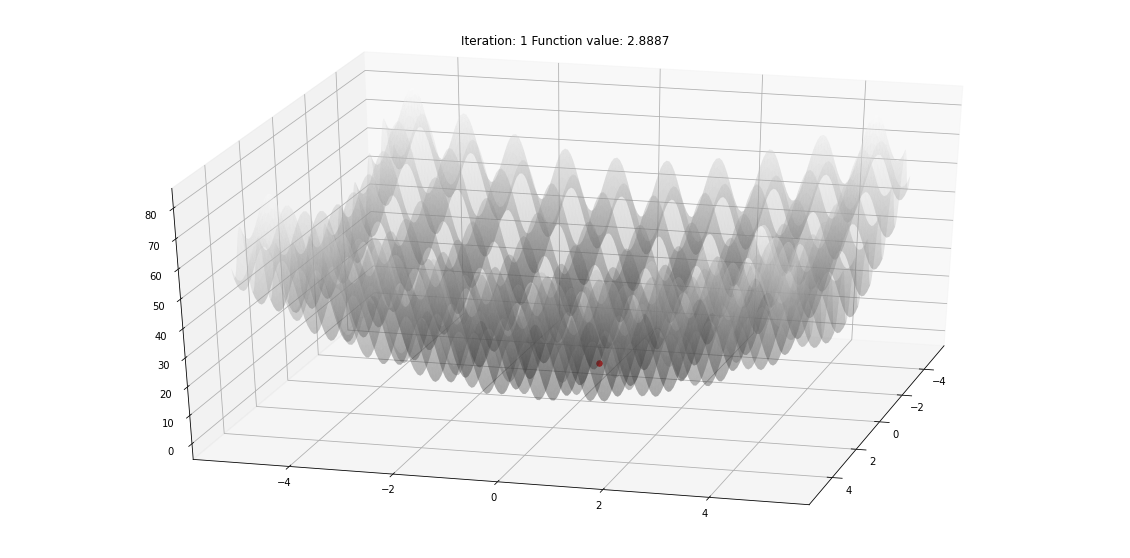

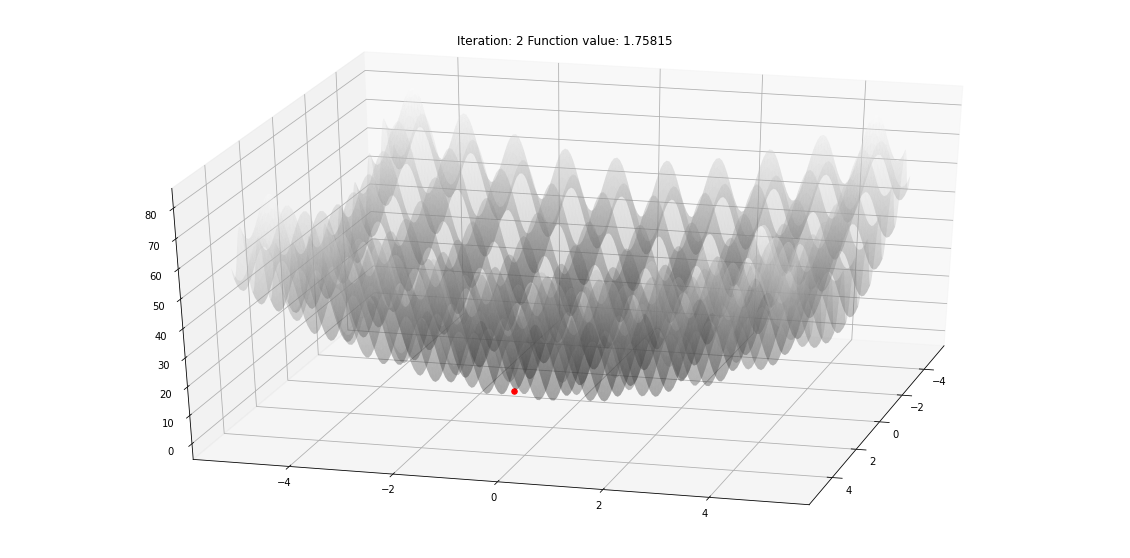

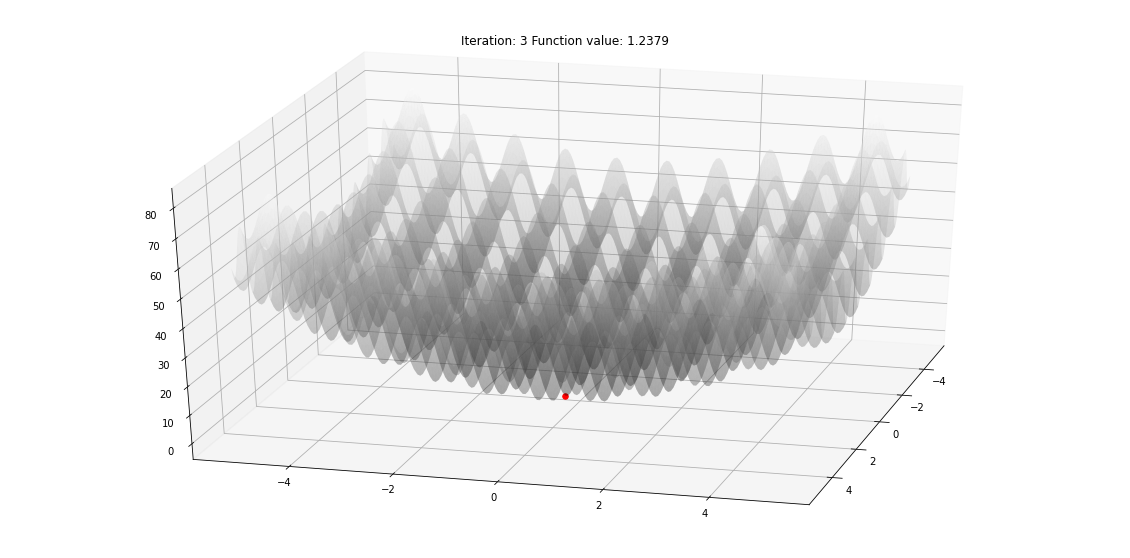

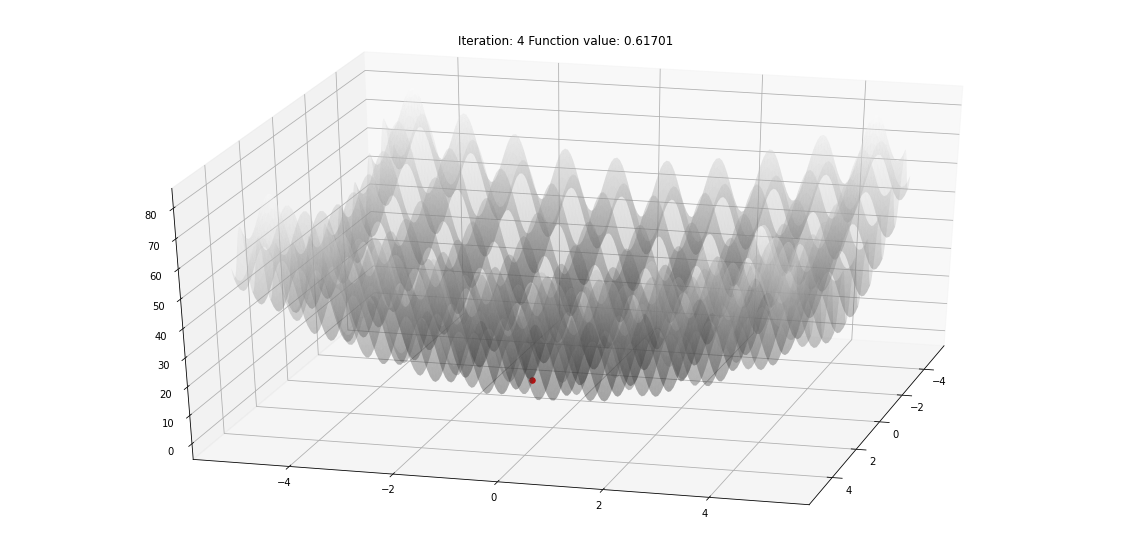

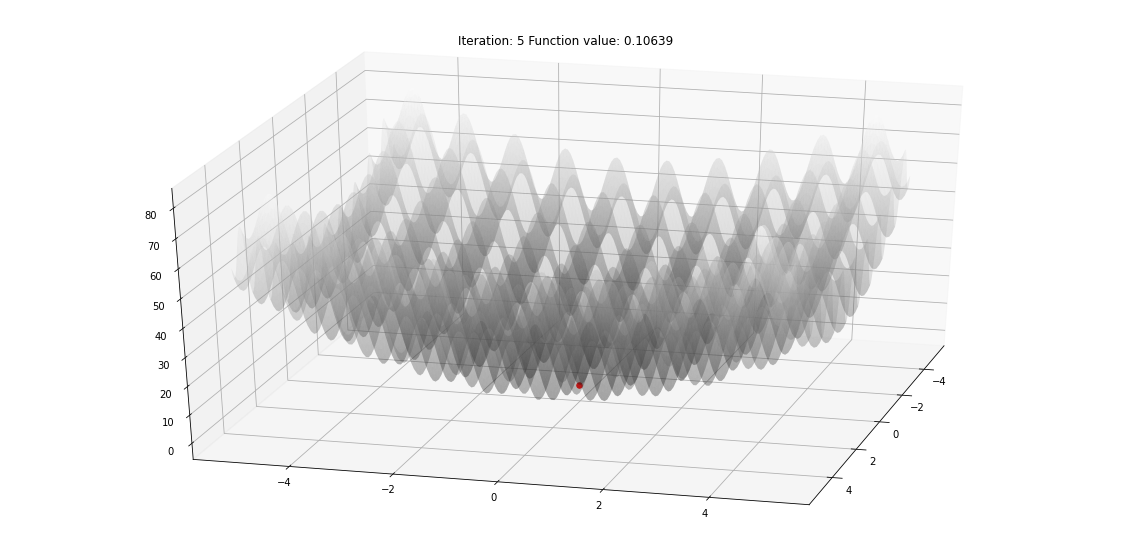

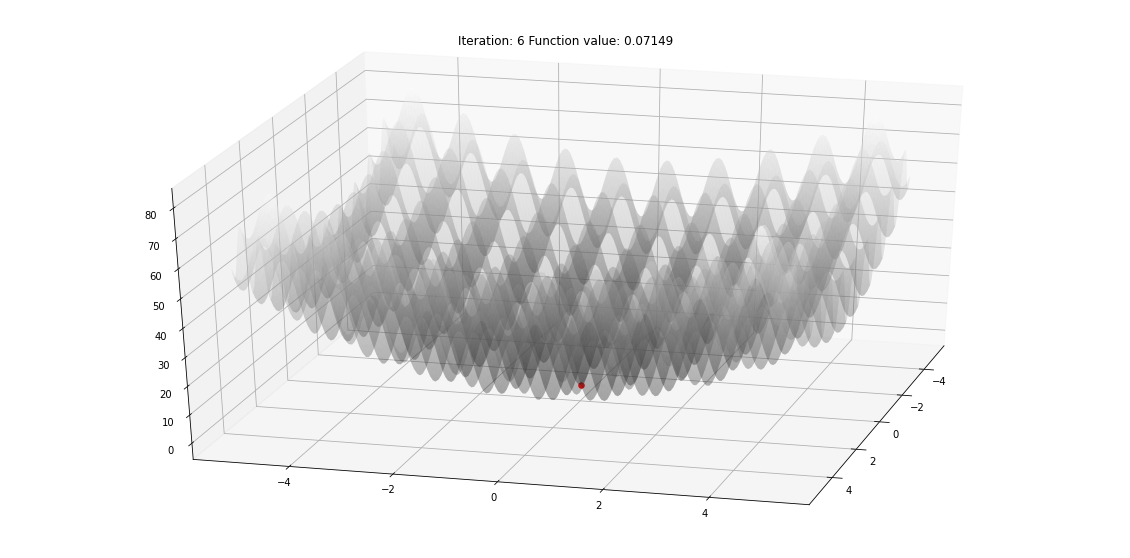

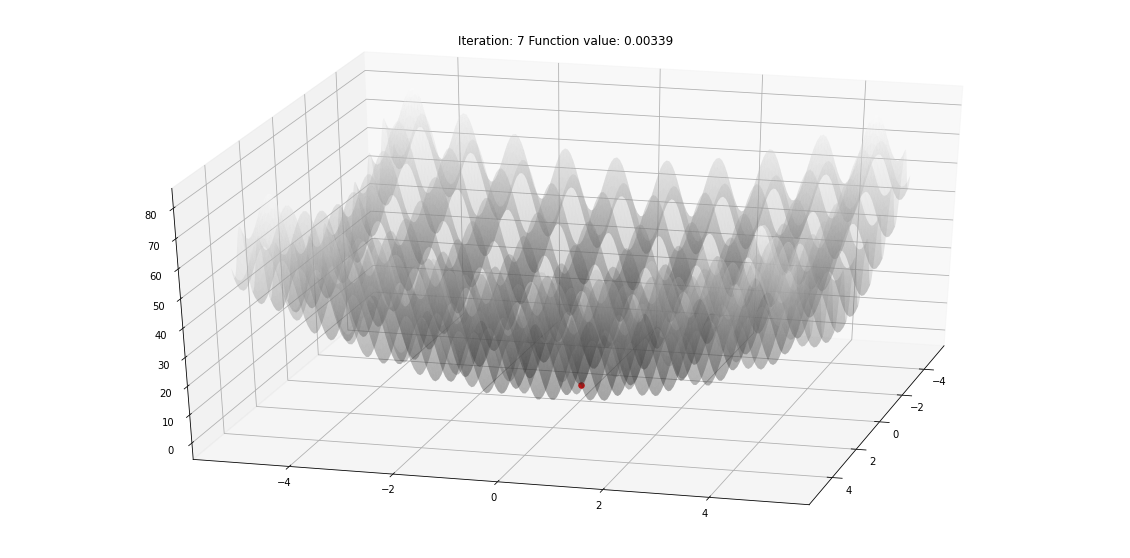

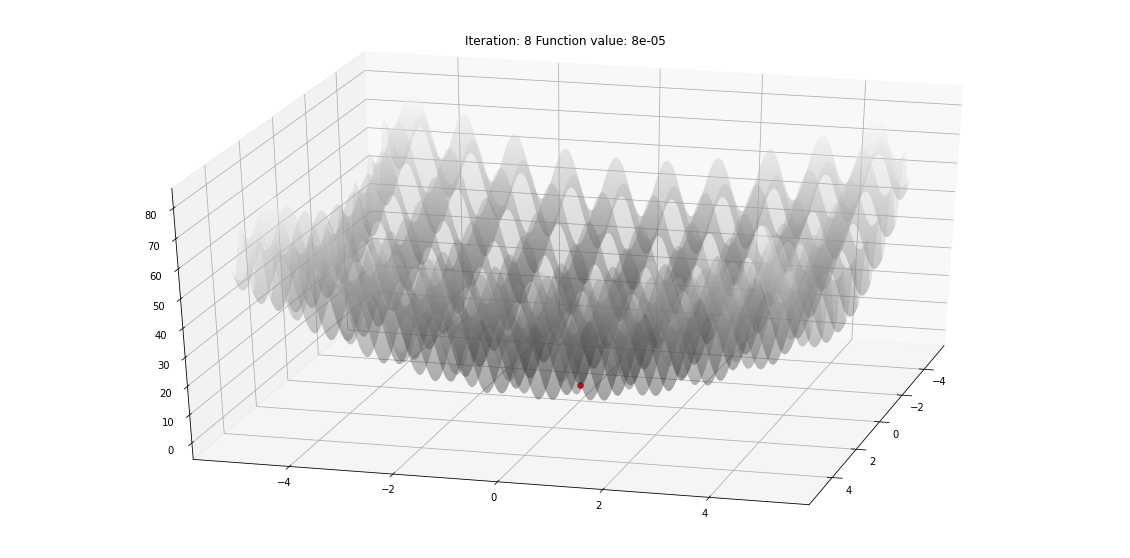

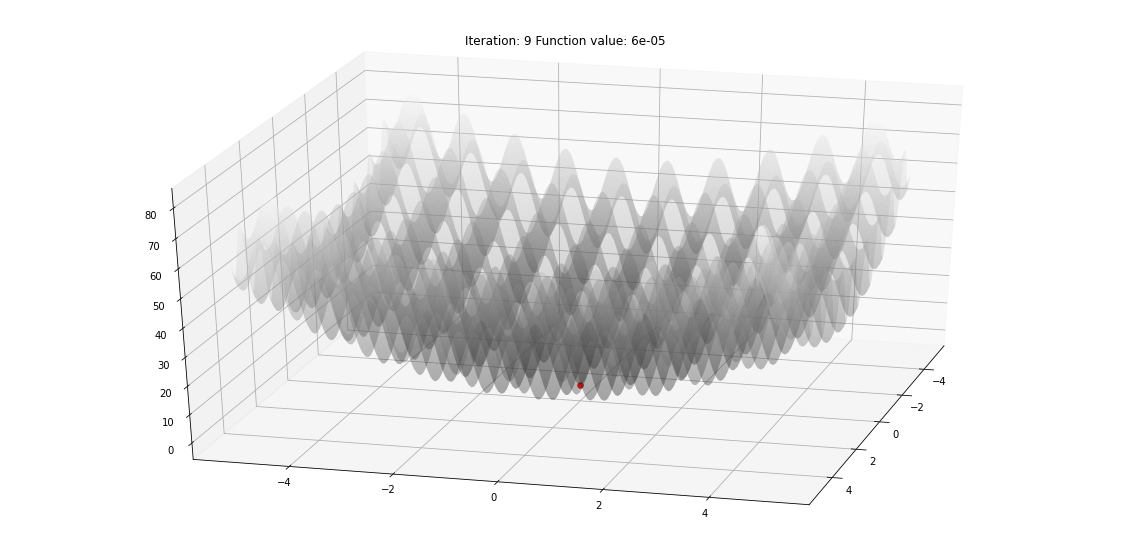

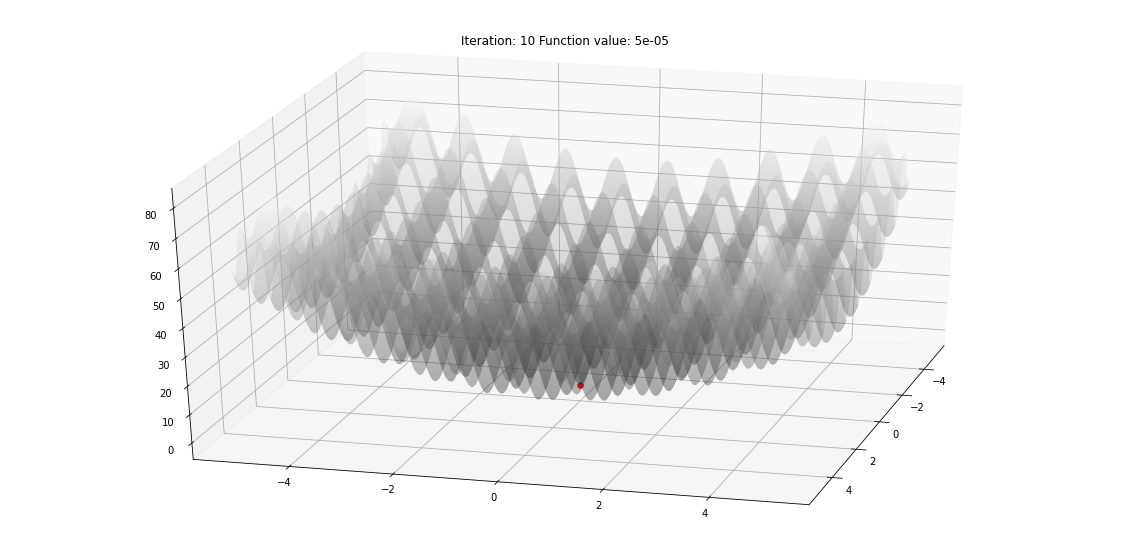

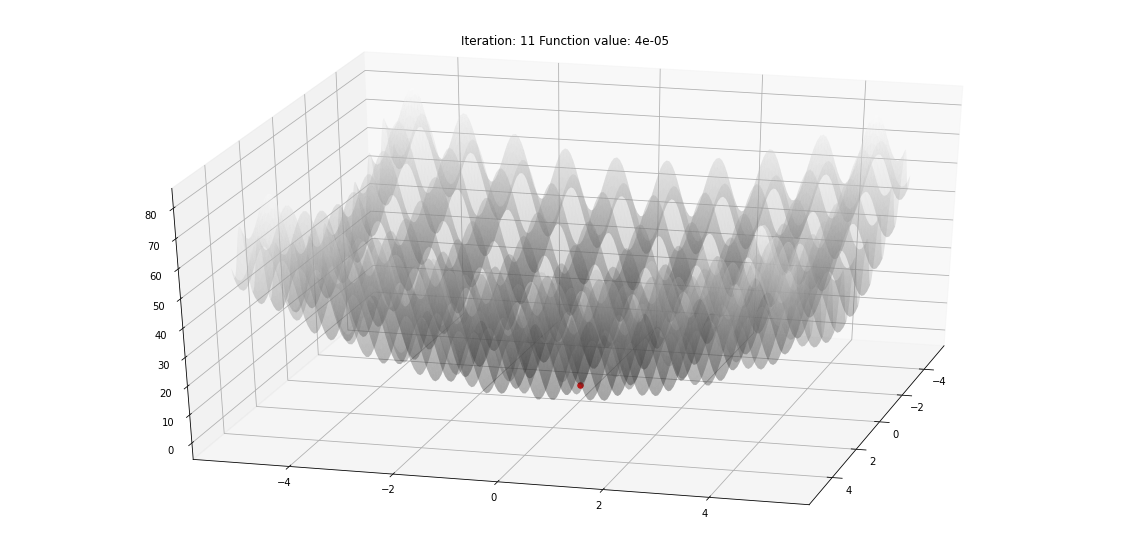

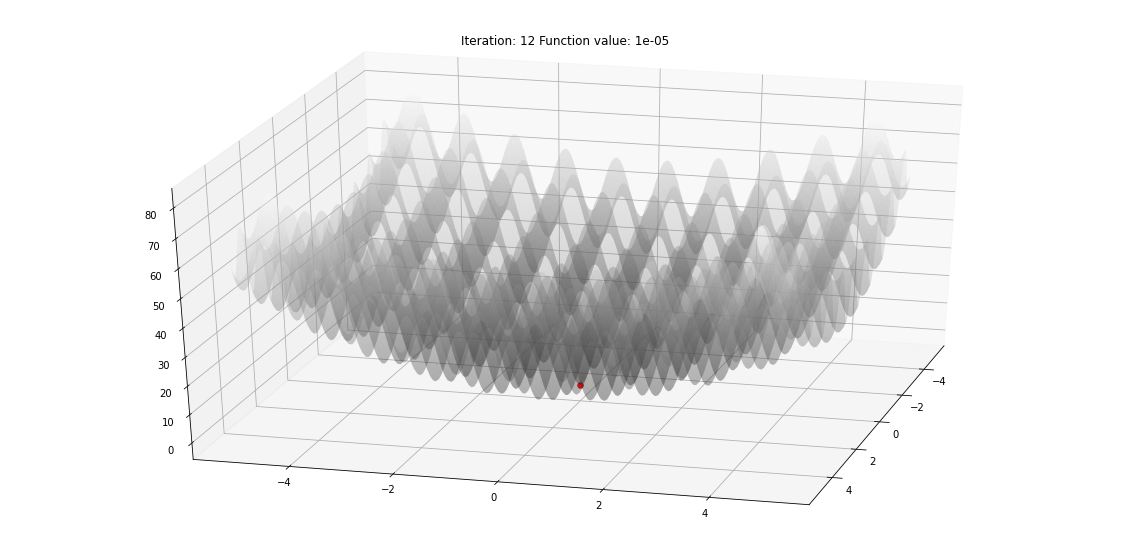

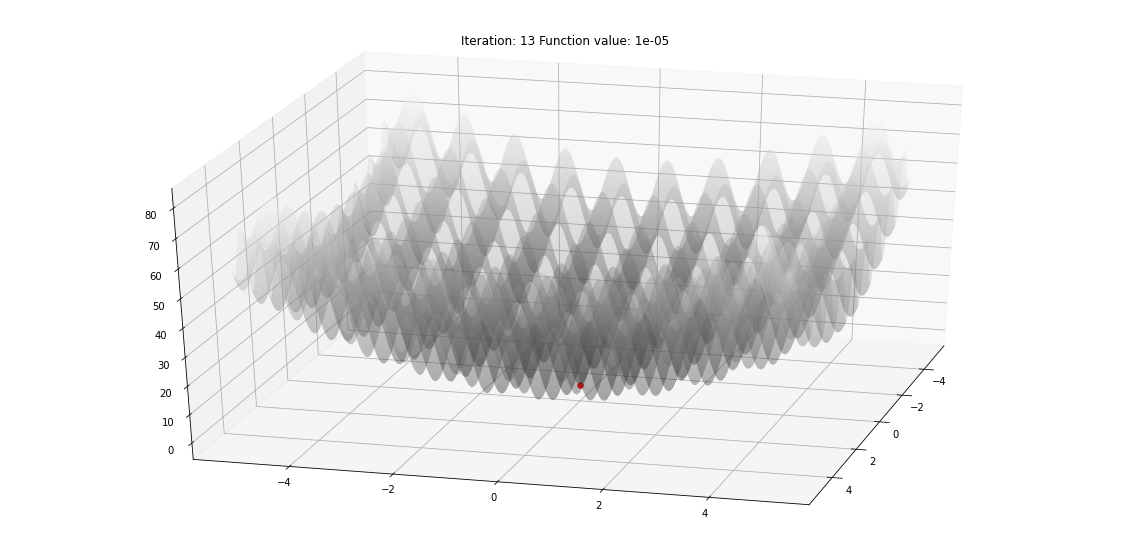

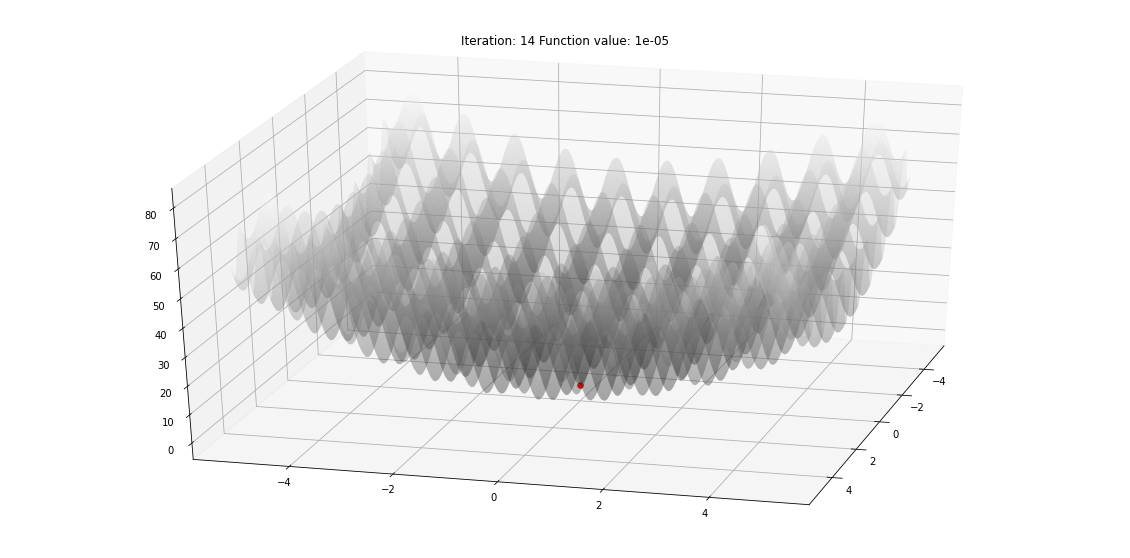

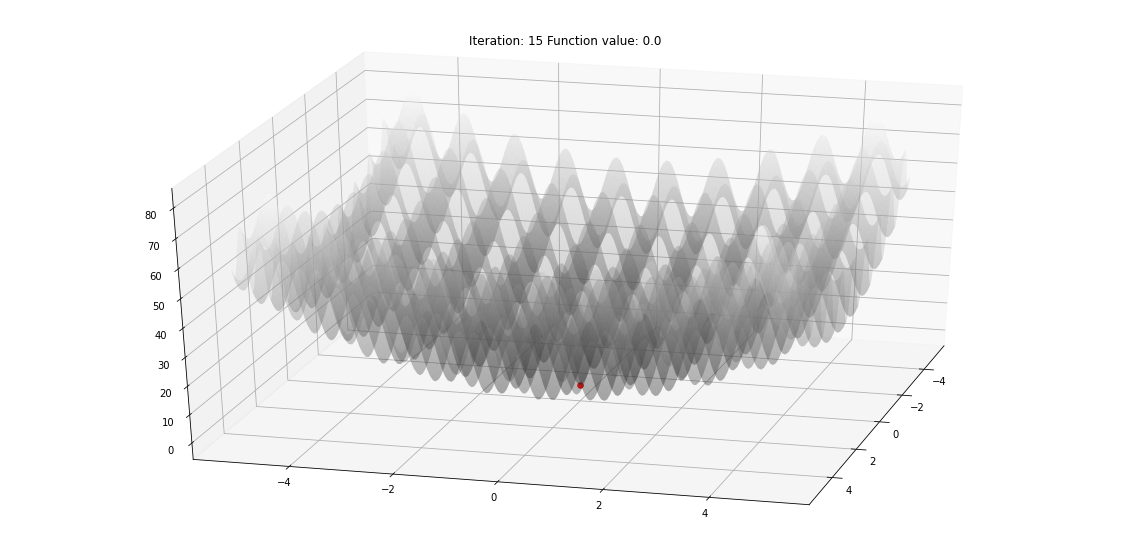

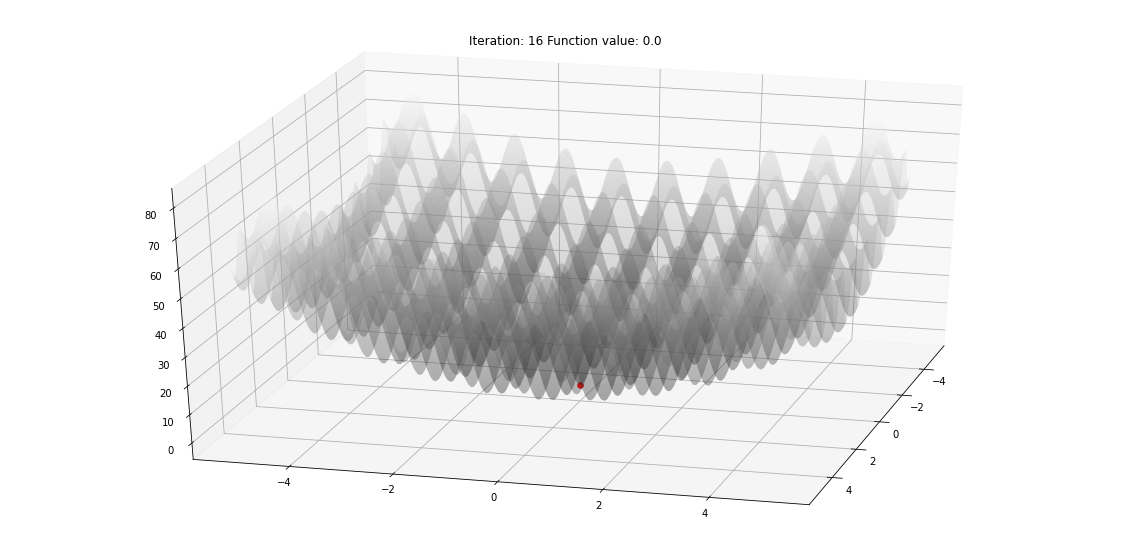

"\nimport holoviews as hv\nfrom holoviews import opts\n\nhv.extension('plotly', 'bokeh', 'matplotlib')\n\nsurface = hv.Surface(Z)\n\n\nzdata = solution[2]\nxdata = [x[0] for x in solution[0]]\nydata = [x[1] for x in solution[0]]\nscat = hv.Scatter3D((xdata[1:], ydata[1:], zdata)).opts(opts.Scatter3D(color='red'))\n\nsurface * scat\n"

In [ ]:
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
import numpy as np
import matplotlib.pyplot as plt
import time

# define objective function
def obj(x):
    return (x[0]**2 - 10 * np.cos(2 * np.pi * x[0])) + (x[1]**2 - 10 * np.cos(2 * np.pi * x[1])) + 20
 
 
# define mutation operation
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])
 
 
# define boundary check operation
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound
 
 
# define crossover operation
def crossover(mutated, target, dims, cr):
    # generate a uniform random value for every dimension
    p = rand(dims)
    # generate trial vector by binomial crossover
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial
 
 
def differential_evolution(pop_size, bounds, iter, F, cr):
    # initialise population of candidate solutions randomly within the specified bounds
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    # evaluate initial population of candidate solutions
    obj_all = [obj(ind) for ind in pop]

    X = np.linspace(-5.12, 5.12, 200)    
    Y = np.linspace(-5.12, 5.12, 200)    
    X, Y = np.meshgrid(X, Y)

    Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20

    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2, cmap='gray')
    for h in range(len(obj_all)):  
      if obj_all[h] == [min(obj_all)]:
        ax.scatter3D(pop[h,0], pop[h,1], obj_all[h], color='red', s=30)
      else:
        ax.scatter3D(pop[h,0], pop[h,1], obj_all[h], color='blue', s=30)
    ax.view_init(30, 15)
    plt.title("Initial positions of all particles (Blue dots) and best particle(Red dot) with value= "+str(around(min(obj_all), decimals=5)))
    plt.savefig("images/initial.png")
    plt.show()

    # find the best performing vector of initial population
    best_vector = [pop[argmin(obj_all)]]
    best_obj = [min(obj_all)]
    prev_obj = best_obj
    # initialise list to store the objective function value at each iteration
    obj_iter = list()
    # run iterations of the algorithm
    for i in range(iter):
        # iterate over all candidate solutions
        for j in range(pop_size):
            # choose three candidates, a, b and c, that are not the current one
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[choice(candidates, 3, replace=False)]
            # perform mutation
            mutated = mutation([a, b, c], F)
            # check that lower and upper bounds are retained after mutation
            mutated = check_bounds(mutated, bounds)
            # perform crossover
            trial = crossover(mutated, pop[j], len(bounds), cr)
            # compute objective function value for target vector
            obj_target = obj(pop[j])
            # compute objective function value for trial vector
            obj_trial = obj(trial)
            # perform selection
            if obj_trial < obj_target:
                # replace the target vector with the trial vector
                pop[j] = trial
                # store the new objective function value
                obj_all[j] = obj_trial
        # find the best performing vector at each iteration
        best_obj1 = min(obj_all)
        # store the lowest objective function value
        if best_obj1 < prev_obj:
            best_vector.append(around(pop[argmin(obj_all)], decimals=5))
            best_obj.append(best_obj1)
            prev_obj = best_obj1
            obj_iter.append(best_obj1)
            # report progress at each iteration
            print('Iteration: %d f([%s]) = %.5f' % (i, best_vector[-1], best_obj1))
    return [best_vector, best_obj, obj_iter]
 
 
# define population size
pop_size = 10
# define lower and upper bounds for every dimension
bounds = asarray([(-5.12, 5.12), (-5.12, 5.12)])
# define number of iterations
iter = 50
# define scale factor for mutation
F = 0.5
# define crossover rate for recombination
cr = 0.8
 
# perform differential evolution
solution = differential_evolution(pop_size, bounds, iter, F, cr)
#print('\nSolution: f([%s]) = ', solution[0])
 
# line plot of best objective function values
#pyplot.plot(solution[2], '.')
#pyplot.xlabel('Improvement Number')
#pyplot.ylabel('Evaluation f(x)')

#pyplot.show()


X = np.linspace(-5.12, 5.12, 200)    
Y = np.linspace(-5.12, 5.12, 200)    
X, Y = np.meshgrid(X, Y)

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20

#ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = solution[2]
xdata = [x[0] for x in solution[0]]
ydata = [x[1] for x in solution[0]]

for k in range(1, len(xdata)-1):
  fig = plt.figure(figsize=(20,10))
  ax = fig.gca(projection='3d')
  surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2, cmap='gray')
  ax.scatter3D(xdata[k], ydata[k], zdata[k], color='red', s=30)
  ax.view_init(30, 15)
  plt.title("Iteration: "+str(k)+" Function value: "+str(around(zdata[k], decimals=5)))
  plt.savefig("images/"+str(k)+".png")
  plt.show()

'''
import holoviews as hv
from holoviews import opts

hv.extension('plotly', 'bokeh', 'matplotlib')

surface = hv.Surface(Z)


zdata = solution[2]
xdata = [x[0] for x in solution[0]]
ydata = [x[1] for x in solution[0]]
scat = hv.Scatter3D((xdata[1:], ydata[1:], zdata)).opts(opts.Scatter3D(color='red'))

surface * scat
'''

In [ ]:
from google.colab import files
!zip -r images.zip images
files.download("images.zip")

  adding: images/ (stored 0%)
  adding: images/5.png (deflated 5%)
  adding: images/11.png (deflated 5%)
  adding: images/10.png (deflated 5%)
  adding: images/12.png (deflated 5%)
  adding: images/16.png (deflated 5%)
  adding: images/2.png (deflated 5%)
  adding: images/4.png (deflated 5%)
  adding: images/9.png (deflated 5%)
  adding: images/14.png (deflated 5%)
  adding: images/1.png (deflated 5%)
  adding: images/6.png (deflated 5%)
  adding: images/13.png (deflated 5%)
  adding: images/7.png (deflated 5%)
  adding: images/8.png (deflated 5%)
  adding: images/3.png (deflated 5%)
  adding: images/initial.png (deflated 5%)
  adding: images/15.png (deflated 5%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import imageio
filenames = ["images/initial.png","images/1.png","images/2.png","images/3.png","images/4.png","images/5.png","images/6.png","images/7.png","images/8.png","images/9.png","images/10.png","images/11.png","images/12.png","images/13.png","images/14.png","images/15.png", "images/16.png"]
with imageio.get_writer('Q1.mp4', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

